# Final Project - Business Economics and Financial Data
## Study on the US housing market
#### Luca Agosti (2062889) - luca.agosti@studenti.unipd.it   
#### Aidin Attar (2048654) - aidin.attar@studenti.unipd.it
#### Leonardo Schiavo (2055519) - leonardo.schiavo.1@studenti.unipd.it

### 0) Libraries used during the project

In [1]:
#Usual libraries
library("dplyr")
library("tibble")
library("ggplot2")
library("purrr")
library("reshape2")


#Libraries to work with timeseries and ARIMA
library("fable")
library("tsibble")
library("urca")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: fabletools


Attaching package: ‘tsibble’


The following objects are masked from ‘package:base’:

    intersect, setdiff, union




### 1) Introduction on the dataset

In [2]:
df = as_tibble(read.csv("cities_csv.csv"))

head(df, 10)

# Cities in the database
names(df)

Date,AZ.Phoenix,CA.Los.Angeles,CA.San.Diego,CA.San.Francisco,CO.Denver,DC.Washington,FL.Miami,FL.Tampa,GA.Atlanta,...,NC.Charlotte,NV.Las.Vegas,NY.New.York,OH.Cleveland,OR.Portland,TX.Dallas,WA.Seattle,Composite.10,Composite.20,National.US
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1987-01-01,NA,59.33,54.67,46.61,50.20,64.11,68.50,77.33,NA,...,63.39,66.36,74.42,53.53,41.05,NA,NA,62.82,NA,63.75
1987-02-01,NA,59.65,54.89,46.87,49.96,64.77,68.76,77.93,NA,...,63.94,67.03,75.43,53.50,41.28,NA,NA,63.39,NA,64.15
1987-03-01,NA,59.99,55.16,47.32,50.15,65.71,69.23,77.76,NA,...,64.17,67.34,76.25,53.68,41.06,NA,NA,63.87,NA,64.49
1987-04-01,NA,60.81,55.85,47.69,50.55,66.40,69.20,77.56,NA,...,64.81,67.88,77.34,53.75,40.96,NA,NA,64.57,NA,64.99
1987-05-01,NA,61.67,56.35,48.31,50.63,67.27,69.46,77.85,NA,...,65.18,67.90,79.16,54.71,41.24,NA,NA,65.56,NA,65.57
1987-06-01,NA,62.71,56.86,48.83,50.50,68.70,69.31,78.71,NA,...,65.55,66.48,80.84,55.12,41.45,NA,NA,66.59,NA,66.24
1987-07-01,NA,63.66,57.26,49.49,50.28,69.79,69.70,79.11,NA,...,65.76,65.43,82.22,55.74,41.82,NA,NA,67.54,NA,66.80
1987-08-01,NA,64.56,57.69,49.94,50.38,70.62,70.16,79.14,NA,...,66.08,65.14,83.01,56.10,41.90,NA,NA,68.25,NA,67.29
1987-09-01,NA,65.38,58.14,50.69,50.18,71.79,70.95,79.24,NA,...,66.47,65.85,83.44,56.51,41.80,NA,NA,68.87,NA,67.64


[1] "Date"             "AZ.Phoenix"       "CA.Los.Angeles"   "CA.San.Diego"    
 [5] "CA.San.Francisco" "CO.Denver"        "DC.Washington"    "FL.Miami"        
 [9] "FL.Tampa"         "GA.Atlanta"       "IL.Chicago"       "MA.Boston"       
[13] "MI.Detroit"       "MN.Minneapolis"   "NC.Charlotte"     "NV.Las.Vegas"    
[17] "NY.New.York"      "OH.Cleveland"     "OR.Portland"      "TX.Dallas"       
[21] "WA.Seattle"       "Composite.10"     "Composite.20"     "National.US"

In [3]:
# Plotting options for the notebook

options(repr.plot.width=10, repr.plot.height=5)

In [4]:
# Plotting all graphs 

# Cercare un modo compatto per far vedere questi grafici, non posso usare la funzione par()
# perchè stampo dentro un ciclo for, ho provato altri metodi ma non ci sono riuscito.

#Names <- names(df)

#for (i in 2:21)
#{
    #city<-ggplot(df, aes(x=as.Date(Date))) + 
    #geom_line(aes(y=.data[[Names[i]]])) +
    #coord_cartesian(xlim=c(as.Date("1987-01-01"), as.Date("2015-12-01")), ylim=c(0,300)) +
    #ylab('Price') +
    #xlab('Year') +
    #ggtitle('Average housing price in American cities [1987-2015]: ', Names[i])
    #print(city)
#}

In [5]:
#df_clean <- df %>% na.omit()
df_clean = df
df_clean$Date <- as.Date(df_clean$Date)
df_clean 

Date,AZ.Phoenix,CA.Los.Angeles,CA.San.Diego,CA.San.Francisco,CO.Denver,DC.Washington,FL.Miami,FL.Tampa,GA.Atlanta,...,NC.Charlotte,NV.Las.Vegas,NY.New.York,OH.Cleveland,OR.Portland,TX.Dallas,WA.Seattle,Composite.10,Composite.20,National.US
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1987-01-01,NA,59.33,54.67,46.61,50.20,64.11,68.50,77.33,NA,...,63.39,66.36,74.42,53.53,41.05,NA,NA,62.82,NA,63.75
1987-02-01,NA,59.65,54.89,46.87,49.96,64.77,68.76,77.93,NA,...,63.94,67.03,75.43,53.50,41.28,NA,NA,63.39,NA,64.15
1987-03-01,NA,59.99,55.16,47.32,50.15,65.71,69.23,77.76,NA,...,64.17,67.34,76.25,53.68,41.06,NA,NA,63.87,NA,64.49
1987-04-01,NA,60.81,55.85,47.69,50.55,66.40,69.20,77.56,NA,...,64.81,67.88,77.34,53.75,40.96,NA,NA,64.57,NA,64.99
1987-05-01,NA,61.67,56.35,48.31,50.63,67.27,69.46,77.85,NA,...,65.18,67.90,79.16,54.71,41.24,NA,NA,65.56,NA,65.57
1987-06-01,NA,62.71,56.86,48.83,50.50,68.70,69.31,78.71,NA,...,65.55,66.48,80.84,55.12,41.45,NA,NA,66.59,NA,66.24
1987-07-01,NA,63.66,57.26,49.49,50.28,69.79,69.70,79.11,NA,...,65.76,65.43,82.22,55.74,41.82,NA,NA,67.54,NA,66.80
1987-08-01,NA,64.56,57.69,49.94,50.38,70.62,70.16,79.14,NA,...,66.08,65.14,83.01,56.10,41.90,NA,NA,68.25,NA,67.29
1987-09-01,NA,65.38,58.14,50.69,50.18,71.79,70.95,79.24,NA,...,66.47,65.85,83.44,56.51,41.80,NA,NA,68.87,NA,67.64


Warning message:
“Removed 492 rows containing missing values (`geom_line()`).”


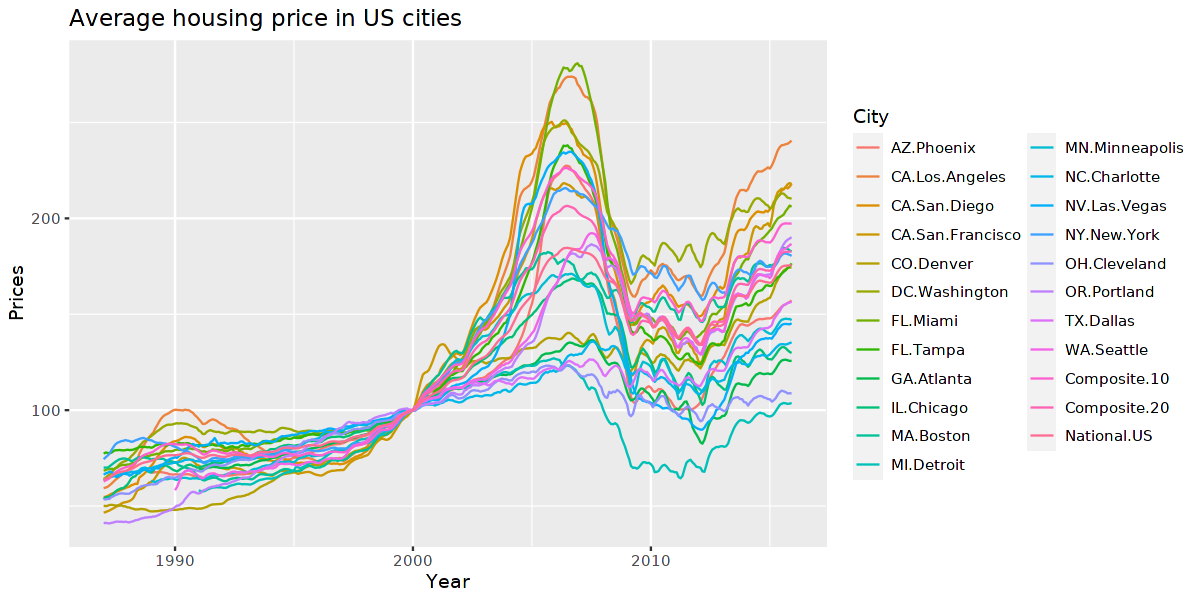

In [6]:
df_melt <- melt(df_clean , id.vars = 'Date', variable.name = 'City')

# Create the plot
ggplot(df_melt, aes(x = Date, y = value, group = City)) +
  geom_line(aes(colour=City))+
  labs(title = "Average housing price in US cities", x = "Year", y = "Prices")


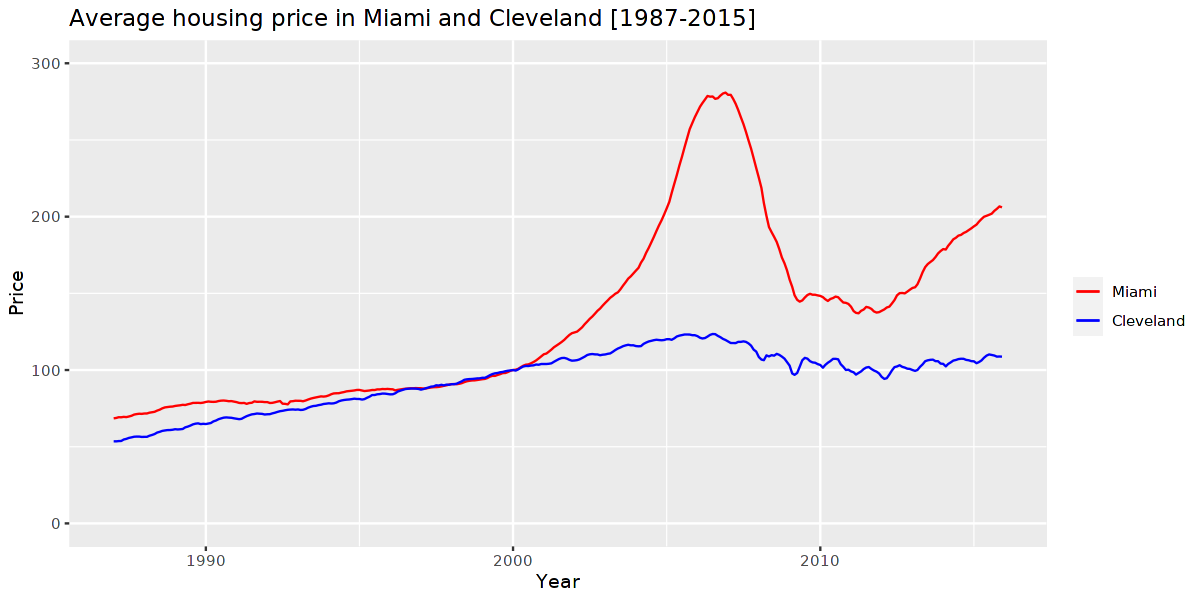

In [7]:
# Comparing Miami and Cleveland
    
ggplot(df, aes(x=as.Date(Date))) + 
    geom_line(aes(y=FL.Miami, colour="Miami")) +
    geom_line(aes(y=OH.Cleveland, colour="Cleveland")) +
    scale_colour_manual("", 
                      breaks = c("Miami", "Cleveland"),
                      values = c("Miami"="red", "Cleveland"="blue")) +
    coord_cartesian(xlim=c(as.Date("1987-01-01"), as.Date("2015-12-01")), ylim=c(0,300)) +
    ylab('Price') + 
    xlab('Year') +
    ggtitle('Average housing price in Miami and Cleveland [1987-2015]')

### 2) ARIMA model analysis

In [8]:
# Time series definition

ts_1 <- tibble(
  date = yearmonth(df$Date),
  price = df$FL.Miami
)

ts_2 <- tibble(
  date = yearmonth(df$Date),
  price = df$OH.Cleveland
)

tsibble_1<-as_tsibble(ts_1, index=date)
tsibble_1<-fill_gaps(tsibble_1, .full = FALSE)
#tsibble_1%>%
    #autoplot(price) +
    #ggtitle('Average housing price time series - Miami [1987-2015]')

tsibble_2<-as_tsibble(ts_2, index=date)
tsibble_2<-fill_gaps(tsibble_2, .full = FALSE)
#tsibble_2%>%
    #autoplot(price) +
    #ggtitle('Average housing price time series - Cleveland [1987-2015]')

fitted_arima_model_1
<model>
"<ARIMA(1,1,3)(0,0,2)[12]>"


fitted_arima_model_2
<model>
"<ARIMA(1,1,2)(0,1,2)[12]>"


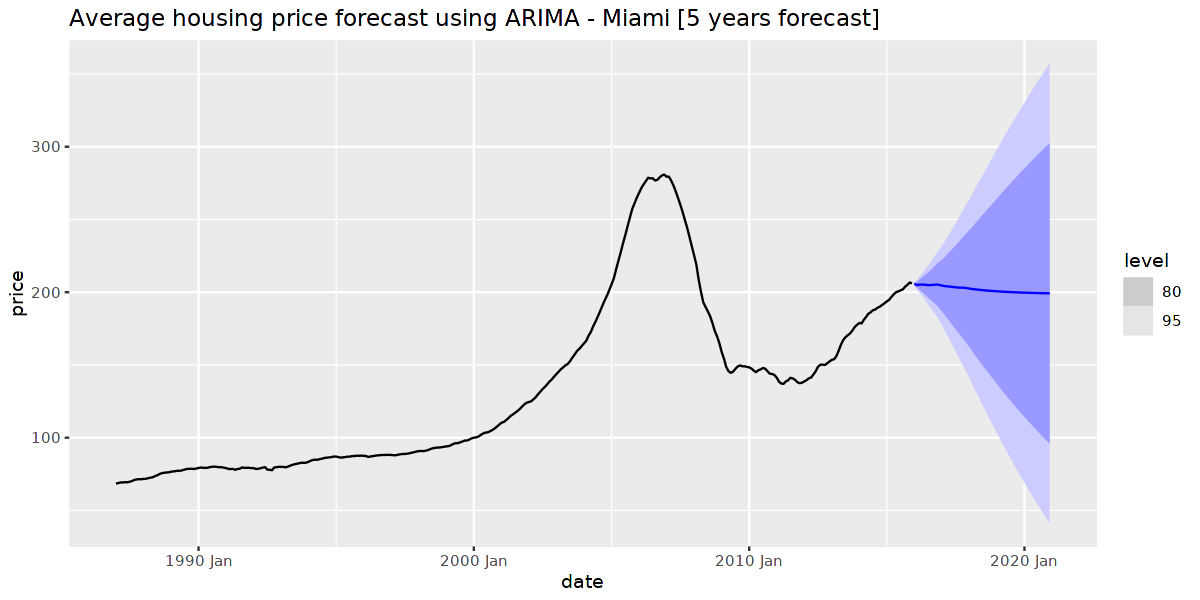

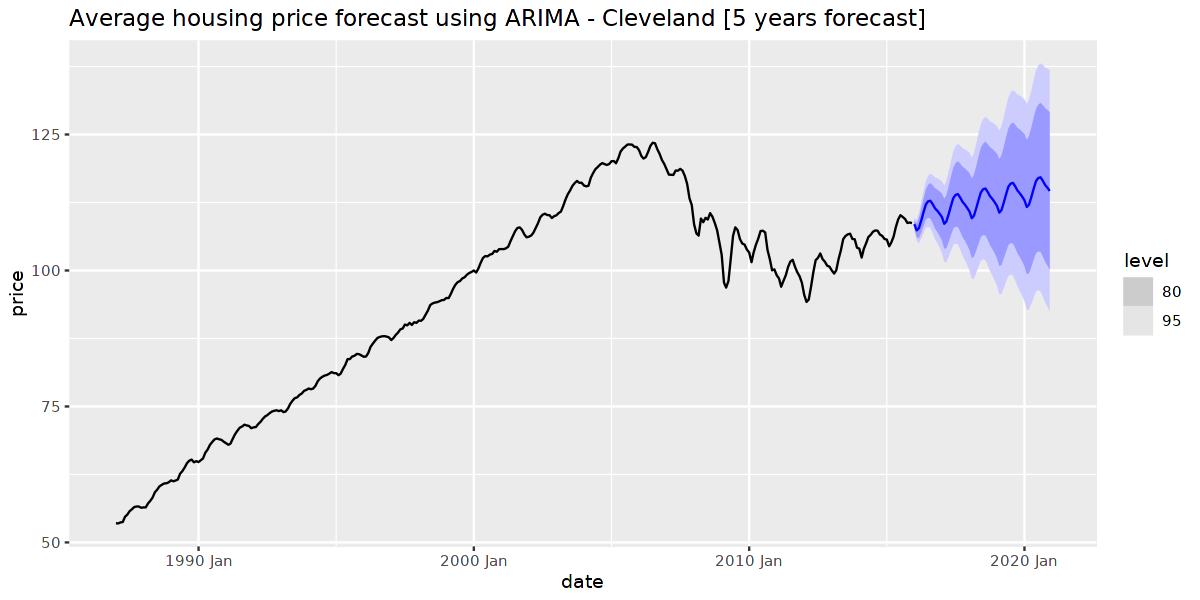

In [9]:
# Forecasting with ARIMA

# Fitting an ARIMA model
fit_ts_1<- tsibble_1 %>%
  model(fitted_arima_model_1 = ARIMA(price ~ pdq(p = 0:10, d = 0:10, q = 0:10)))

fit_ts_2<- tsibble_2 %>%
  model(fitted_arima_model_2 = ARIMA(price ~ pdq(p = 0:10, d = 0:10, q = 0:10)))

fit_ts_1
fit_ts_2

# Forcasting the time series using the fitted ARIMA model
fc_ts_1 <- fit_ts_1 %>%
  forecast(h = 60)

fc_ts_1%>%
    autoplot(tsibble_1) + 
    ggtitle('Average housing price forecast using ARIMA - Miami [5 years forecast]')

fc_ts_2 <- fit_ts_2 %>%
  forecast(h = 60)

fc_ts_2%>%
    autoplot(tsibble_2) + 
    ggtitle('Average housing price forecast using ARIMA - Cleveland [5 years forecast]')

### 3) Regression model analysis

### Local Regression

In [10]:
library(sm)
library(splines)

Package 'sm', version 2.2-5.7: type help(sm) for summary information



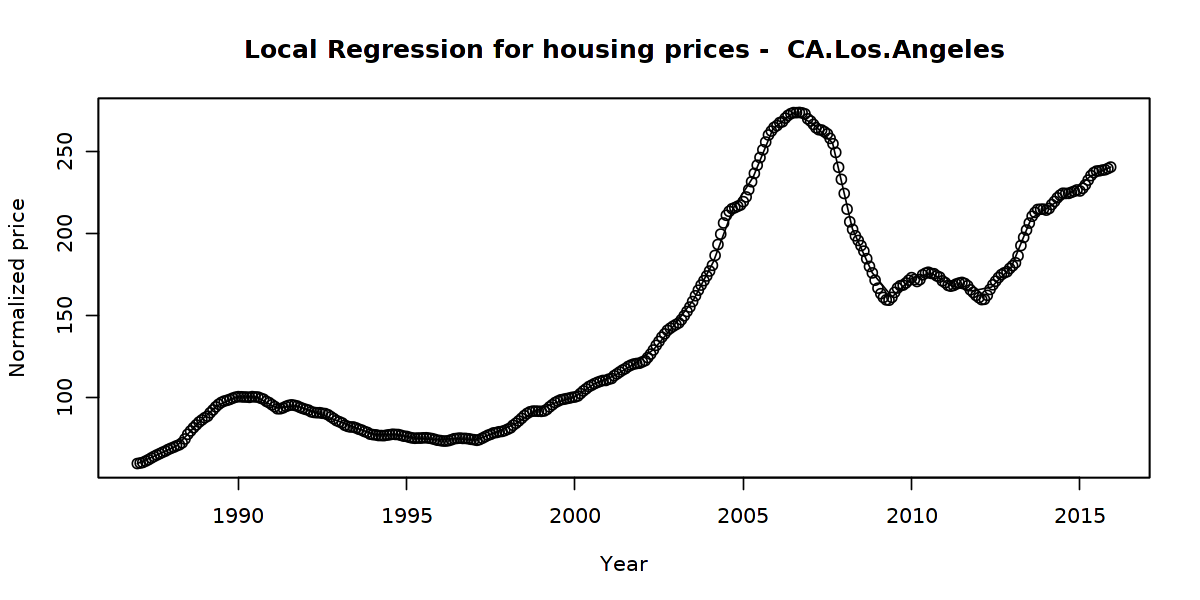

In [11]:
column <- "CA.Los.Angeles"

x <- df_clean$Date
y <- df_clean[[column]]

plot(
    x,y, 
    main=paste("Local Regression for housing prices - ", column),
    xlab = "Year",
    ylab = "Normalized price"
)
sm.regression(x, y,   h = 10, add = T)

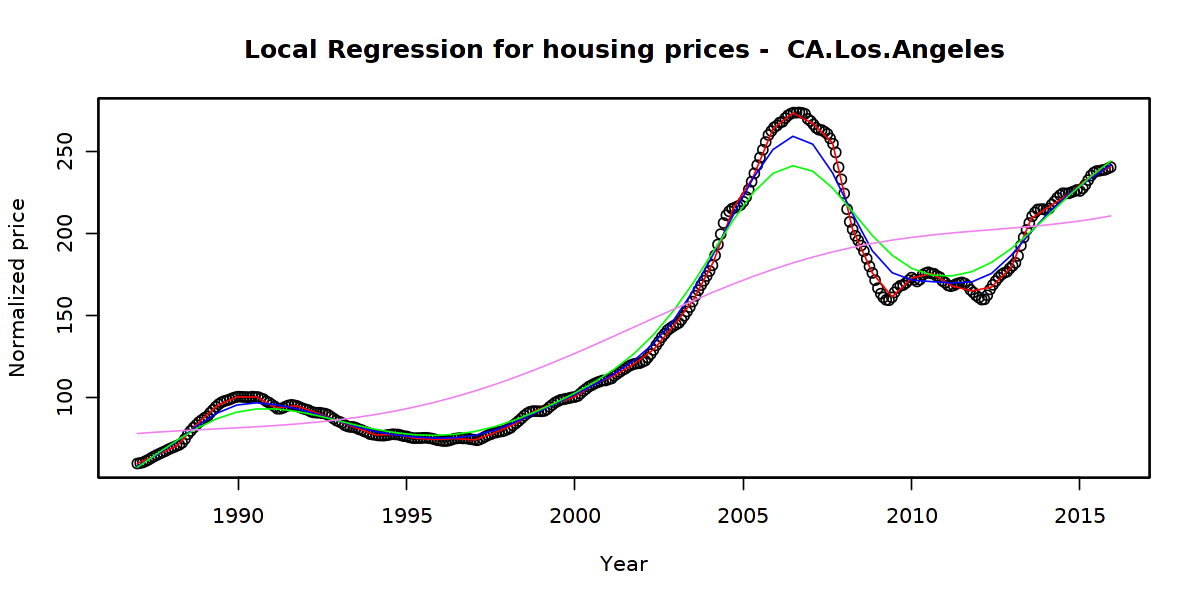

In [12]:
plot(
    x,y, 
    main=paste("Local Regression for housing prices - ", column),
    xlab = "Year",
    ylab = "Normalized price"
)

# Using different values for h (lower h -> jumpier,
# higher h -> smoother)
sm.regression(x, y, h = 10,   add = T, col="red")
sm.regression(x, y, h = 300,  add = T, col="blue")
sm.regression(x, y, h = 500,  add = T, col="green")
sm.regression(x, y, h = 2000, add = T, col="violet")

### Loess

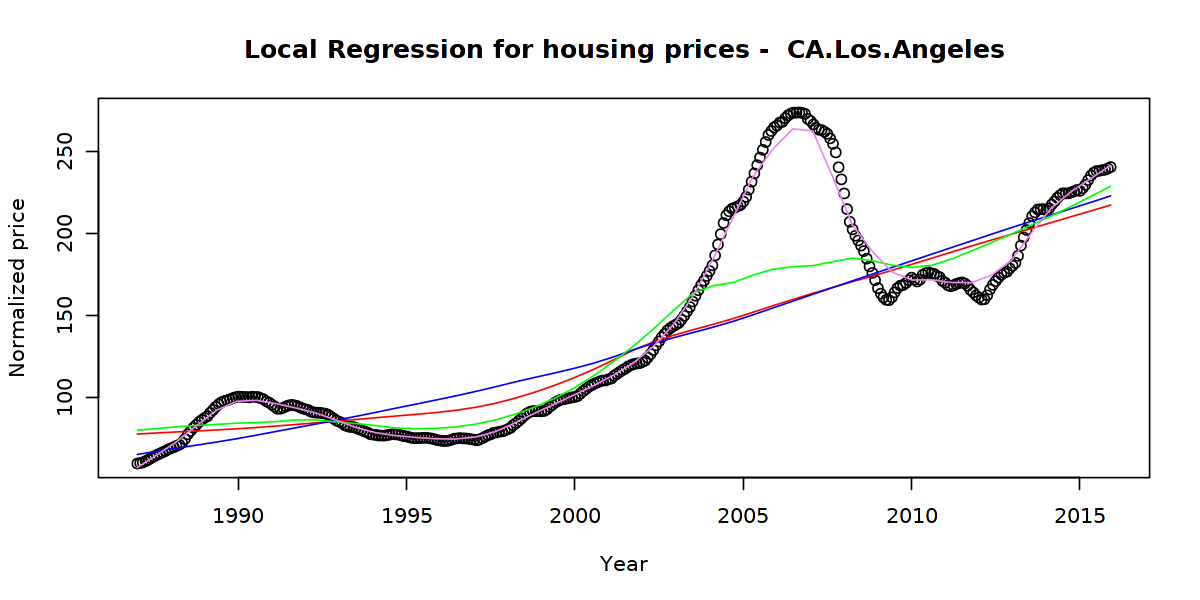

In [13]:
plot(
    x,y, 
    main=paste("Local Regression for housing prices - ", column),
    xlab = "Year",
    ylab = "Normalized price"
)

# different values of smoothing
lo1 <- loess.smooth(x,y) # default span = .75
lo2 <- loess.smooth(x,y,span=0.9)
lo3 <- loess.smooth(x,y,span=0.4)
lo4 <- loess.smooth(x,y,span=0.1)

lines(lo1, col='red')
lines(lo2, col='blue')
lines(lo3, col='green')
lines(lo4, col='violet')

### Regression cubic splines

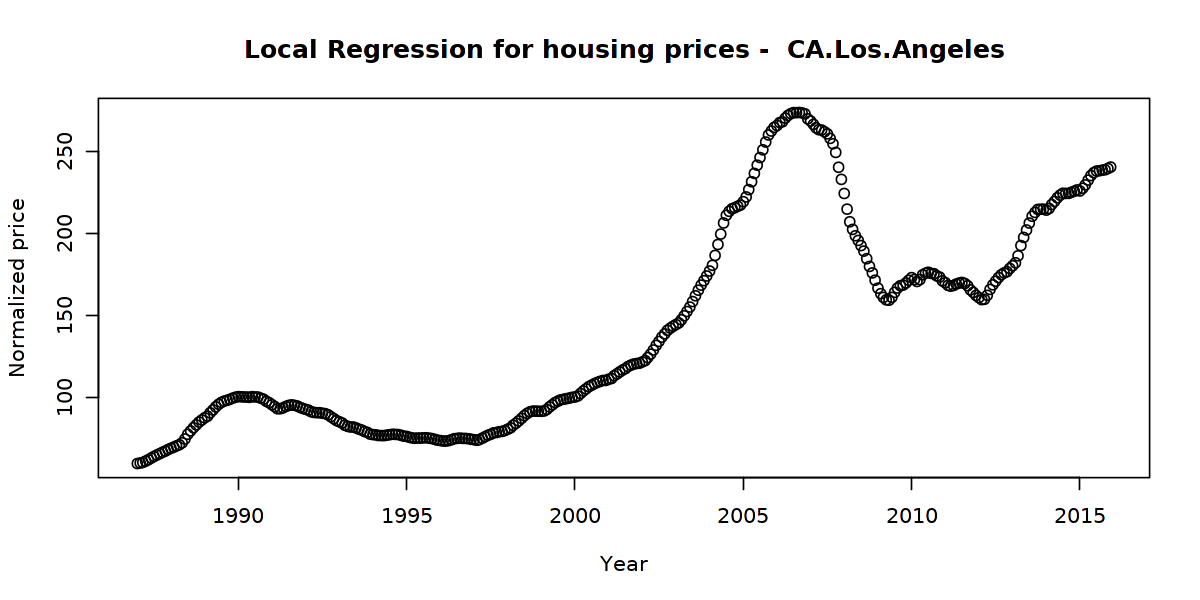

In [14]:
plot(
    x,y, 
    main=paste("Local Regression for housing prices - ", column),
    xlab = "Year",
    ylab = "Normalized price"
)

#we select and identify the knots 'equispaced'
xi<-seq(min(x), max(x), length=4)

#----- Model (2 internal knots)
m1<-lm(y ~ bs(x, knots=xi[2:(length(xi)-1)], degree=3))

###---- for graphical reasons select 200 points where to evaluate the model
xxx<-seq(min(x),max(x),length=200)

#Make predictions by using the 'xxx' points
fit1<-predict(m1, data.frame(x=xxx))

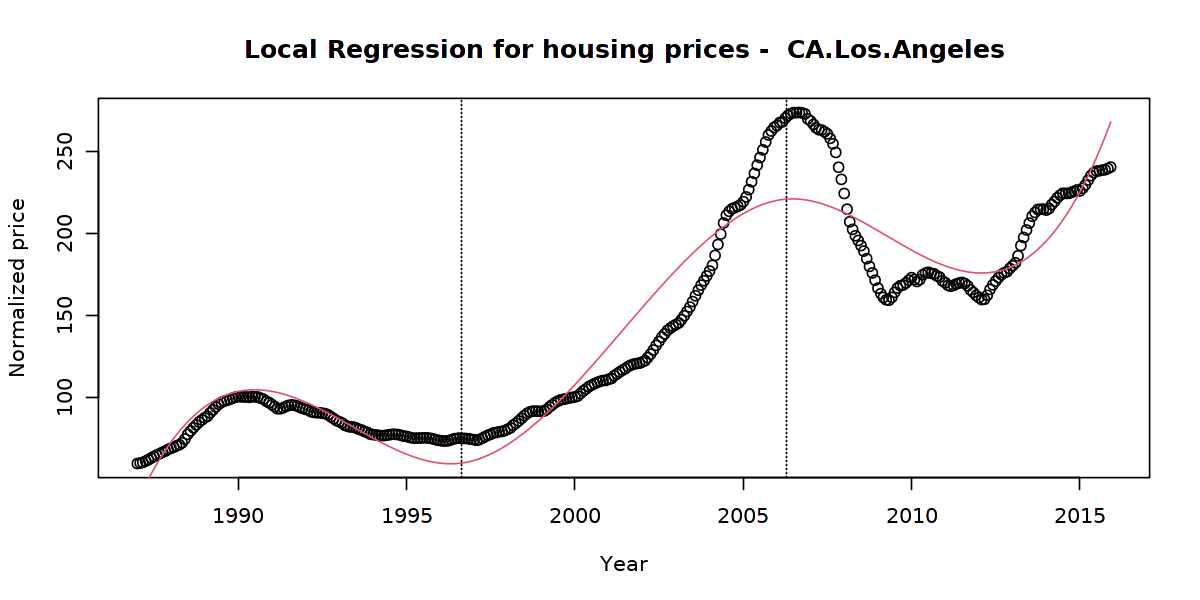

In [15]:
plot(
    x,y, 
    main=paste("Local Regression for housing prices - ", column),
    xlab = "Year",
    ylab = "Normalized price"
)
lines(xxx,fit1,col=2)

# vertical plots to indicate the knots
abline(v=xi[2], lty=3)
abline(v=xi[3], lty=3)

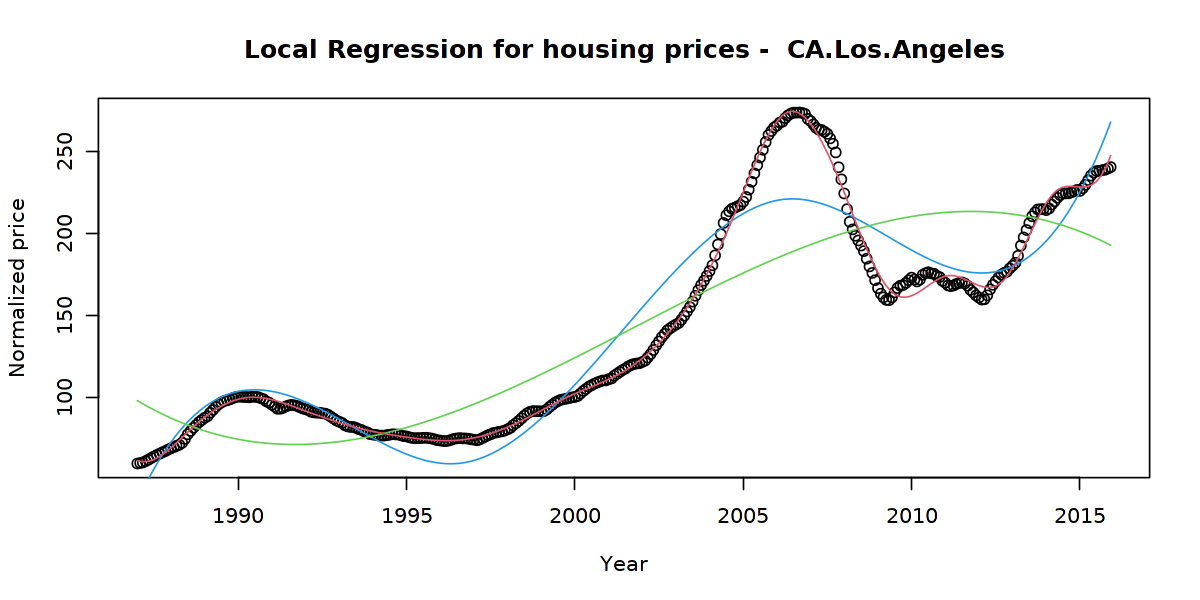

In [16]:
plot(
    x,y, 
    main=paste("Local Regression for housing prices - ", column),
    xlab = "Year",
    ylab = "Normalized price"
)

# first model with 2 internal knots
m1<-lm(y~bs(x, df=5, degree=3)) 
fit1<-predict(m1, data.frame(x=xxx))
lines(xxx,fit1,col=4)

# second model with no internal knots 
m2 <- lm(y ~ bs(x, df=3, degree=3)) 
fit2<-predict(m2,data.frame(x=xxx))
#plot(x,y,xlab="engine size", ylab="distance")
lines(xxx,fit2,col=3)

# Third model with 17 knots 
m3<-lm(y~bs(x,df=20,degree=3))
fit3<-predict(m3,data.frame(x=xxx))
#plot(x,y,xlab="engine size", ylab="distance")
lines(xxx,fit3,col=2)

### Smoothing splines

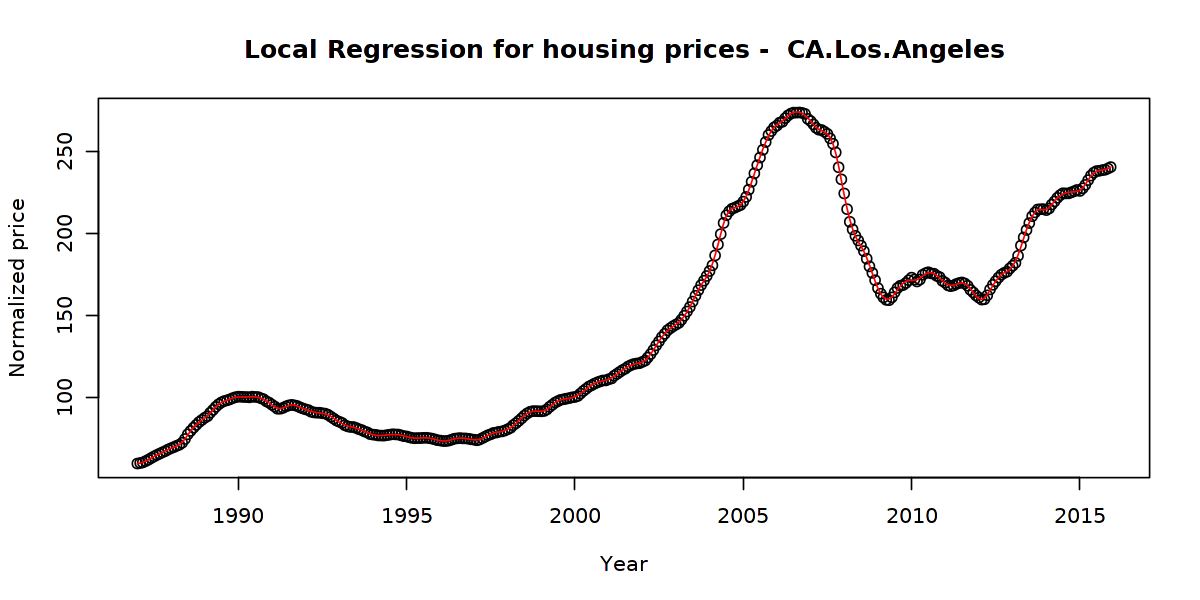

In [17]:
plot(
    x,y, 
    main=paste("Local Regression for housing prices - ", column),
    xlab = "Year",
    ylab = "Normalized price"
)

s <- smooth.spline(x,y)
lines(s, col='red')

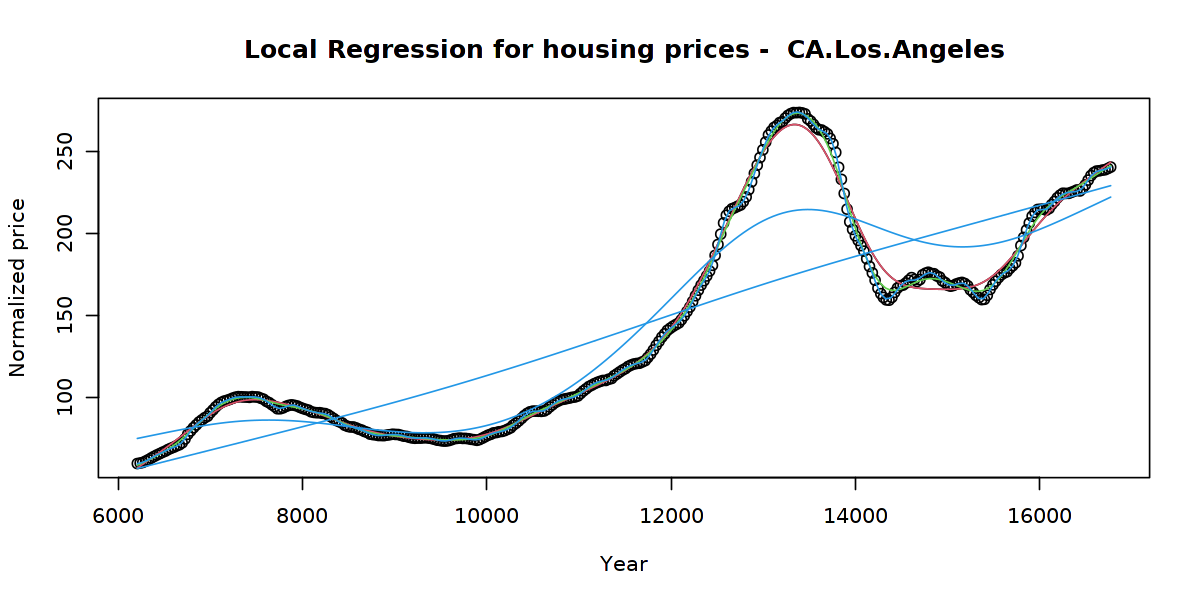

In [18]:
# Convert the dates to the number of days since 1970-01-01
x_ <- as.numeric(difftime(x, as.Date("1970-01-01")))
xxx_<-seq(min(x_),max(x_),length=200)

plot(
    x_,y, 
    main=paste("Local Regression for housing prices - ", column),
    xlab = "Year",
    ylab = "Normalized price"
)

# Model 1
s1 <- smooth.spline(x_,y, lambda=0.0001)
lines(s1)
p1<- predict(s1, x=xxx_)
lines(p1, col=2)

# Model 2
s2 <- smooth.spline(x_,y, lambda=0.00001)
p2<- predict(s2, x=xxx_)
lines(p2, col=3)

# Model 3
s3 <- smooth.spline(x_,y, lambda=0.01)
p3<- predict(s3, x=xxx_)
lines(p3, col=4)

# Model 4
s4 <- smooth.spline(x_,y, lambda=1)
p4<- predict(s4, x=xxx_)
lines(p4, col=4)

# Model 5
s5 <- smooth.spline(x_,y, lambda=0.00000001)
p5<- predict(s5, x=xxx_)
lines(p5, col=4)

### Generalized Additive Models

In [19]:
library(gam)

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loaded gam 1.22




In [20]:
tt<- (1:length(y))
seas <- factor(rep(1:12,length(y)/12)) 
#####1:3 because there are three observations 'out' 
mod2 <- lm(y~ tt+seas)
summary(mod2)
AIC(mod2)


Call:
lm(formula = y ~ tt + seas)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.082 -29.365  -7.434  14.902 100.841 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 50.116015   7.795669   6.429 4.43e-10 ***
tt           0.516031   0.020161  25.596  < 2e-16 ***
seas2       -0.662237   9.916058  -0.067    0.947    
seas3       -0.671371   9.916120  -0.068    0.946    
seas4        0.003977   9.916222   0.000    1.000    
seas5        0.927602   9.916366   0.094    0.926    
seas6        1.868813   9.916550   0.188    0.851    
seas7        2.522093   9.916776   0.254    0.799    
seas8        2.823304   9.917042   0.285    0.776    
seas9        2.716928   9.917349   0.274    0.784    
seas10       2.289518   9.917698   0.231    0.818    
seas11       1.583833   9.918087   0.160    0.873    
seas12       0.799182   9.918517   0.081    0.936    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.76 o

[1] 3529.667


Call: gam(formula = y ~ s(tt) + seas)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-43.101 -15.693  -6.688  13.397  69.166 

(Dispersion Parameter for gaussian family taken to be 642.4567)

    Null Deviance: 1414405 on 347 degrees of freedom
Residual Deviance: 213295.5 on 331.9998 degrees of freedom
AIC: 3255.126 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
           Df Sum Sq Mean Sq   F value Pr(>F)    
s(tt)       1 936241  936241 1457.2819 <2e-16 ***
seas       11    839      76    0.1187 0.9998    
Residuals 332 213295     642                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F     Pr(F)    
(Intercept)                             
s(tt)             3 137.14 < 2.2e-16 ***
seas                                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] 3255.126

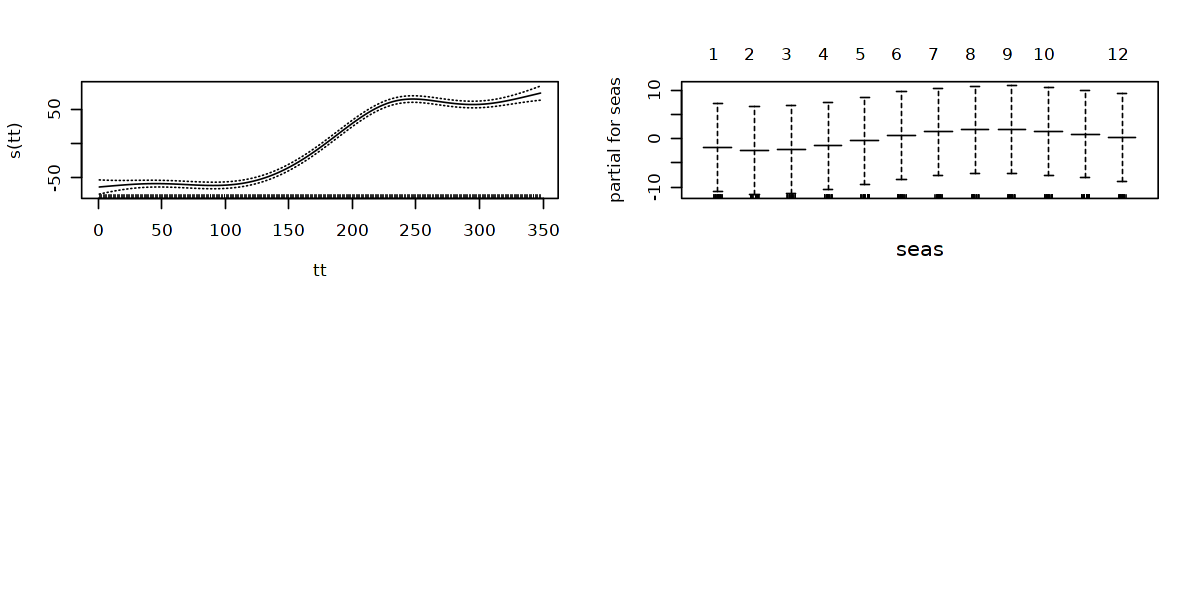

In [21]:
#Values for df should be greater than 1, with df=1 implying a linear fit. Default is df=4
g1 <- gam(y~s(tt)+seas)
summary(g1)

#######time and Japan have a nonlinear effect (always take care of interpretability!)

par(mfrow=c(2,2))
plot(g1, se=T)
AIC(g1)


Call: gam(formula = y ~ (tt) + seas)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-46.082 -29.365  -7.434  14.902 100.841 

(Dispersion Parameter for gaussian family taken to be 1425.753)

    Null Deviance: 1414405 on 347 degrees of freedom
Residual Deviance: 477627.3 on 335 degrees of freedom
AIC: 3529.667 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
           Df Sum Sq Mean Sq  F value Pr(>F)    
tt          1 936241  936241 656.6639 <2e-16 ***
seas       11    537      49   0.0343      1    
Residuals 335 477627    1426                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 3529.667

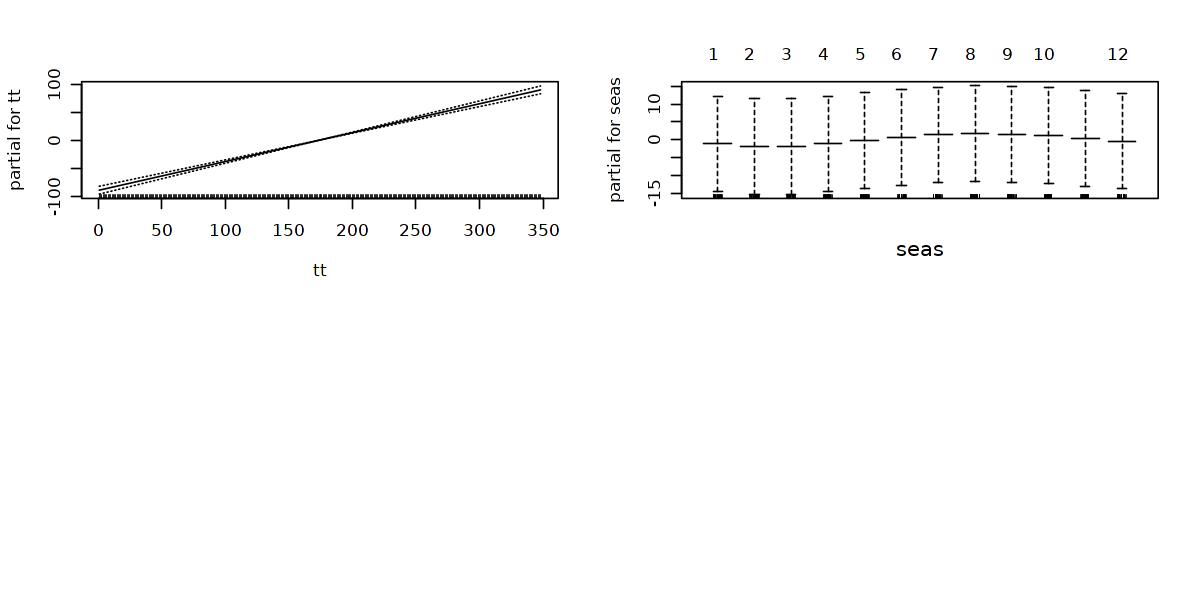

In [22]:
####linear model may be also performed with library(gam)
g0 <- gam(y~(tt)+seas)
summary(g0)
par(mfrow=c(2,2))
plot(g0, se=T)
AIC(g0)

### 4) Bass model analysis

In [23]:
#install.packages('DIMORA', dependencies = TRUE)

In [24]:
library(DIMORA)

Loading required package: minpack.lm

Loading required package: numDeriv

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following objects are masked from ‘package:fabletools’:

    accuracy, forecast


Loading required package: deSolve



### 4.1 Bass Model

Call: ( Standard Bass Model )

  BM(series = city_data_1, display = T)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1687.9  -527.2   188.6   142.3  1030.6  1643.3 

Coefficients:
       Estimate    Std.Error        Lower        Upper  p-value    
m 1.121593e+05 8.796057e+03 9.491937e+04 1.293993e+05 8.91e-31 ***
p 4.732651e-04 2.769858e-05 4.189769e-04 5.275533e-04 7.37e-48 ***
q 7.009169e-03 2.999536e-04 6.421271e-03 7.597068e-03 4.52e-73 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  970.7424  on  345  degrees of freedom
 Multiple R-squared:   0.9983505  Residual squared sum:  334040548

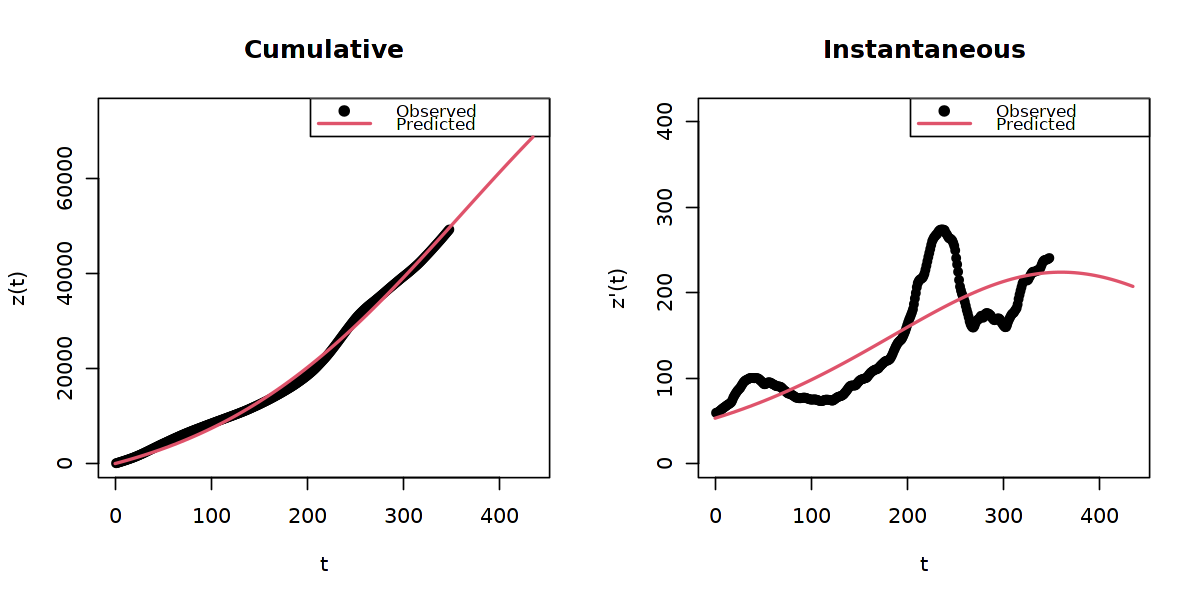

In [25]:
city_data_1<-df$CA.Los.Angeles

bm_city_1<-BM(city_data_1, display = T)
summary(bm_city_1)

Call: ( Standard Bass Model )

  BM(series = city_data_2, display = T)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-71.812 -24.641   7.606   4.112  26.366  51.788 

Coefficients:
       Estimate    Std.Error        Lower        Upper  p-value    
m 2.022585e+04 1.476861e+02 1.993639e+04 2.051531e+04 1.58e-74 ***
p 7.517221e-03 3.105879e-05 7.456347e-03 7.578095e-03 7.60e-89 ***
q 3.690513e-02 4.436053e-04 3.603568e-02 3.777458e-02 4.89e-62 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  30.3764  on  58  degrees of freedom
 Multiple R-squared:   0.9999855  Residual squared sum:  56394.82

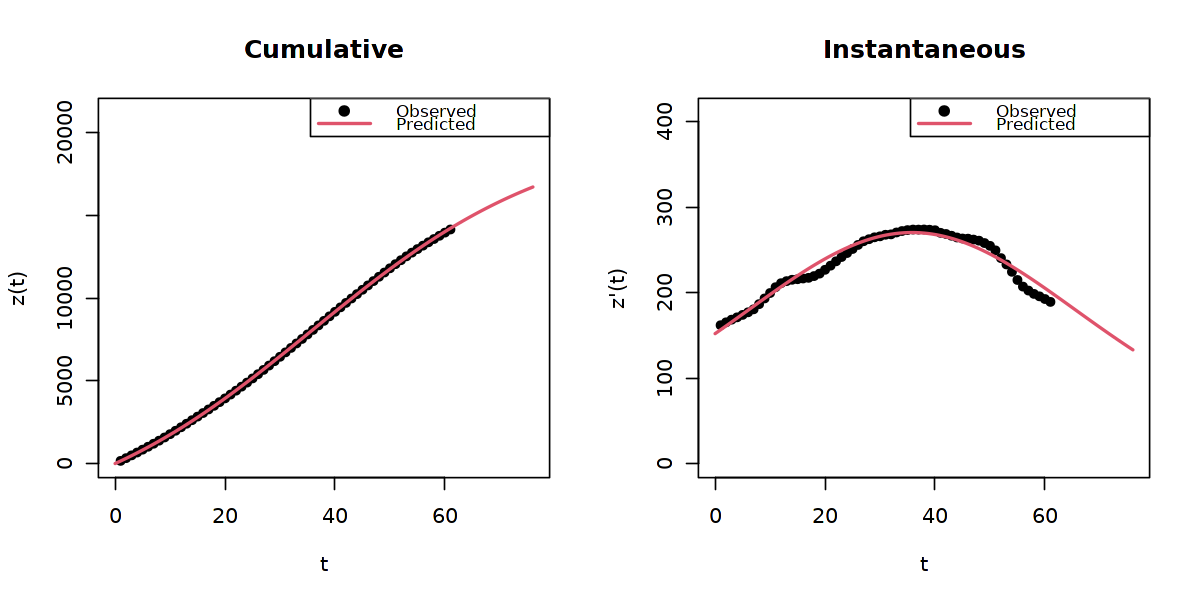

In [26]:
city_data_2<-df$CA.Los.Angeles[200:260]

bm_city_2<-BM(city_data_2,display = T)
summary(bm_city_2)

Call: ( Standard Bass Model )

  BM(series = city_data_3, display = T)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-24.617  -6.255   6.527   2.195  10.369  18.754 

Coefficients:
       Estimate    Std.Error        Lower        Upper  p-value    
m 2.340341e+04 1.062096e+03 2.132174e+04 2.548508e+04 3.02e-23 ***
p 6.423780e-03 2.656703e-04 5.903076e-03 6.944484e-03 1.12e-24 ***
q 2.508258e-02 8.542747e-04 2.340824e-02 2.675693e-02 1.01e-27 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  12.68264  on  38  degrees of freedom
 Multiple R-squared:   0.9999917  Residual squared sum:  6631.447

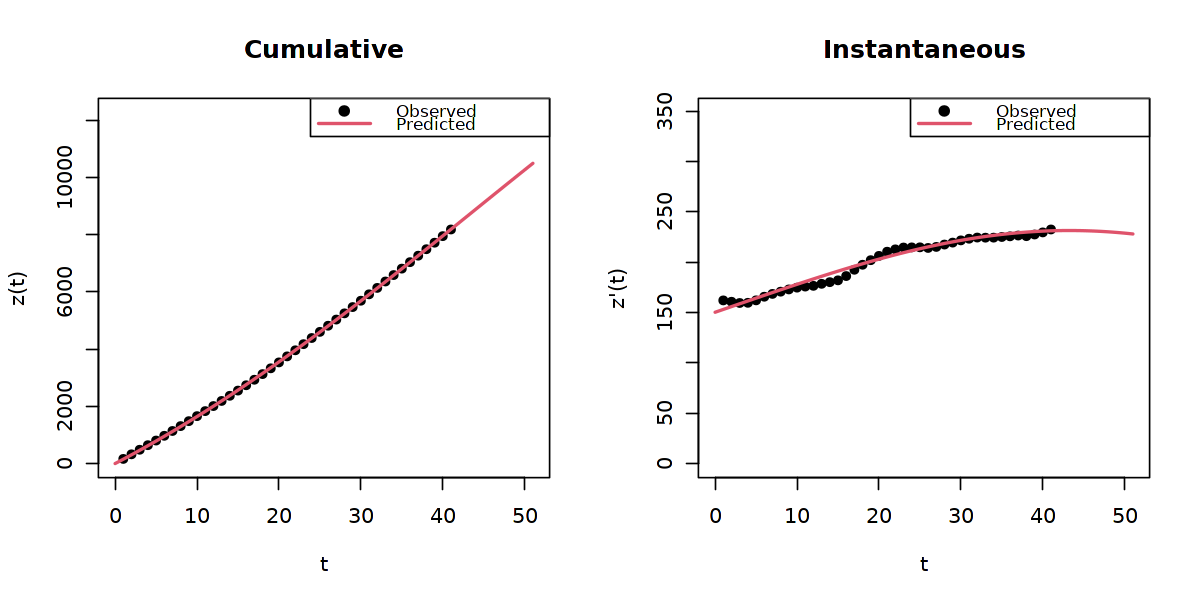

In [27]:
city_data_3<-df$CA.Los.Angeles[300:340]

bm_city_3<-BM(city_data_3,display = T)
summary(bm_city_3)

### 4.2 Generalized Bass Model

Call: ( Generalized Bass model with 2  Rectangular  shock )

  GBM(series = city_data_1, shock = "rett", nshock = 2, prelimestimates = c(BM(city_data_1, 
    display = FALSE)$Estimate[1, 1], BM(city_data_1, display = FALSE)$Estimate[2, 
    1], BM(city_data_1, display = FALSE)$Estimate[3, 1], 20, 
    60, 1, 35, 45, 1))

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1298.05  -440.08    46.75    34.24   564.98  1441.89 

Coefficients:
           Estimate    Std.Error         Lower        Upper   p-value    
m     7.207809e+04 1.930713e+03  6.829396e+04 7.586222e+04 3.88e-122 ***
p     1.336362e-06 6.392420e-05 -1.239528e-04 1.266255e-04  9.83e-01    
q     1.158491e-02 4.062742e-04  1.078863e-02 1.238119e-02  4.55e-92 ***
a1   -8.646381e+01 4.502623e+06 -8.825066e+06 8.824893e+06  1.00e+00    
b1    5.253839e+01 3.630417e+00  4.542290e+01 5.965388e+01  2.70e-37 ***
c1    1.830333e+00 5.785627e-01  6.963706e-01 2.964295e+00  1.70e-03  **
a2   -3.369767e+01 1.990006e

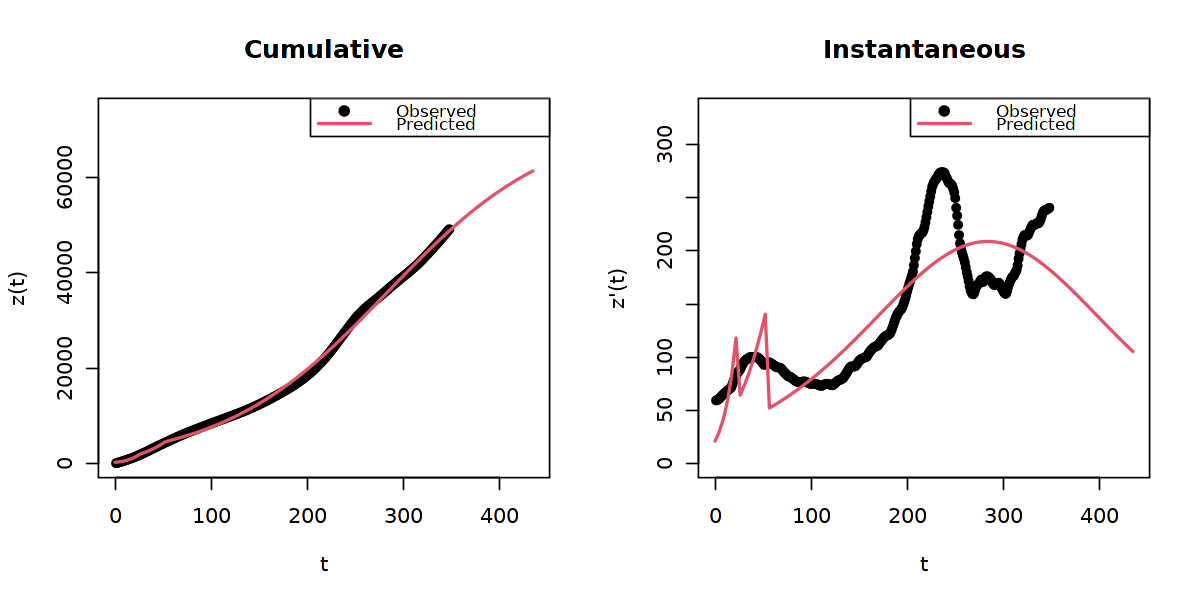

In [28]:
GBM_city_1<-GBM(city_data_1, 
                shock = "rett", 
                nshock = 2, 
                prelimestimates = c(BM(city_data_1, display=FALSE)$Estimate[1,1], 
                                    BM(city_data_1, display=FALSE)$Estimate[2,1], 
                                    BM(city_data_1, display=FALSE)$Estimate[3,1], 
                                    20,60,1,
                                    35,45,1
                                    )
                )
                
summary(GBM_city_1)

Call: ( Generalized Bass model with 2  Rectangular  shock )

  GBM(series = city_data_2, shock = "rett", nshock = 2, prelimestimates = c(BM(city_data_2, 
    display = FALSE)$Estimate[1, 1], BM(city_data_2, display = FALSE)$Estimate[2, 
    1], BM(city_data_2, display = FALSE)$Estimate[3, 1], 40, 
    55, 0.1, 10, 20, 0.1))

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-13.4934  -4.1930  -0.7760   0.6043   6.2308  17.0905 

Coefficients:
           Estimate    Std.Error         Lower         Upper  p-value    
m     1.920396e+04 6.789110e+01  1.907090e+04  1.933703e+04 1.47e-84 ***
p     8.025118e-03 2.601884e-05  7.974122e-03  8.076114e-03 1.64e-86 ***
q     3.873654e-02 2.083719e-04  3.832813e-02  3.914494e-02 4.35e-75 ***
a1    3.983583e+01 4.498943e-01  3.895405e+01  4.071760e+01 2.15e-58 ***
b1    5.355784e+01 6.691320e-01  5.224636e+01  5.486931e+01 3.95e-56 ***
c1    4.606857e-02 3.181372e-03  3.983319e-02  5.230394e-02 6.94e-20 ***
a2    1.374556e+01 4.391

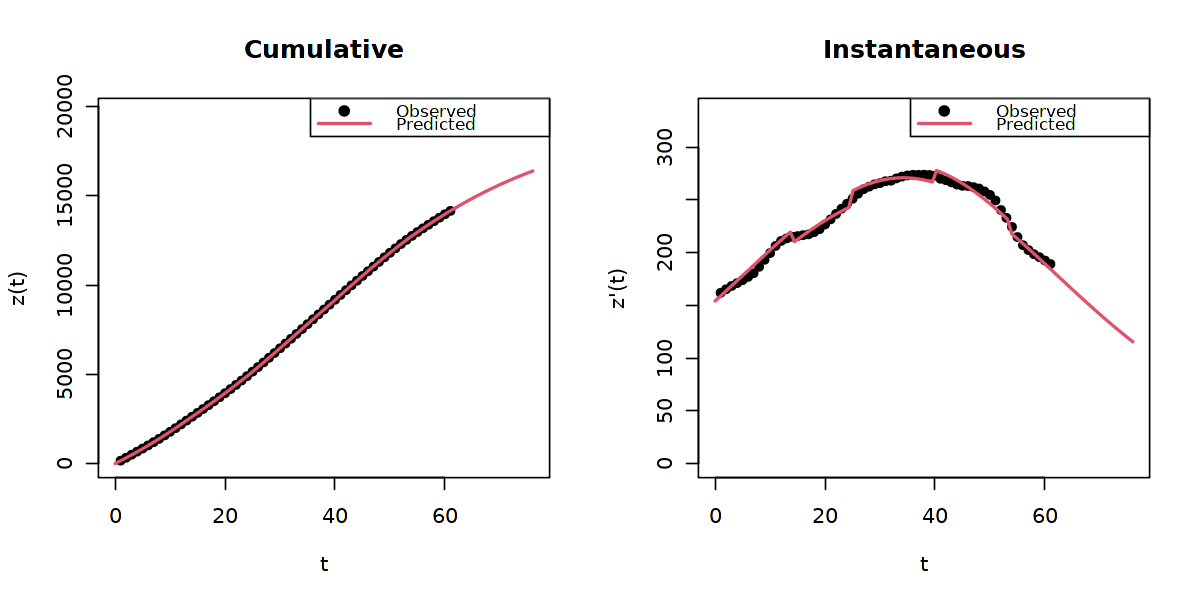

In [29]:
GBM_city_2<-GBM(city_data_2, 
                shock = "rett", 
                nshock = 2, 
                prelimestimates = c(BM(city_data_2, display=FALSE)$Estimate[1,1], 
                                    BM(city_data_2, display=FALSE)$Estimate[2,1], 
                                    BM(city_data_2, display=FALSE)$Estimate[3,1], 
                                    40,55,0.1,
                                    10,20,0.1
                                    )
                )

summary(GBM_city_2)

Call: ( Generalized Bass model with 1  Rectangular  shock )

  GBM(series = city_data_3, shock = "rett", nshock = 1, prelimestimates = c(BM(city_data_3, 
    display = FALSE)$Estimate[1, 1], BM(city_data_3, display = FALSE)$Estimate[2, 
    1], BM(city_data_3, display = FALSE)$Estimate[3, 1], 5, 20, 
    0.1))

Residuals:
      Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.596780 -1.695687 -0.357681  0.000002  0.775283  4.746646 

Coefficients:
           Estimate    Std.Error         Lower         Upper  p-value    
m     2.429863e+04 4.703877e+02  2.337669e+04  2.522058e+04 1.24e-34 ***
p     6.857784e-03 1.022990e-04  6.657282e-03  7.058287e-03 1.48e-38 ***
q     2.162755e-02 4.716967e-04  2.070304e-02  2.255205e-02 7.57e-33 ***
a1    5.911089e-01 1.743171e-01  2.494537e-01  9.327641e-01 1.74e-03  **
b1    1.706267e+01 1.226814e-01  1.682222e+01  1.730312e+01 1.32e-49 ***
c1   -7.317932e-02 2.987532e-03 -7.903477e-02 -6.732386e-02 1.29e-23 ***
---
 Signif. codes:  0 '**

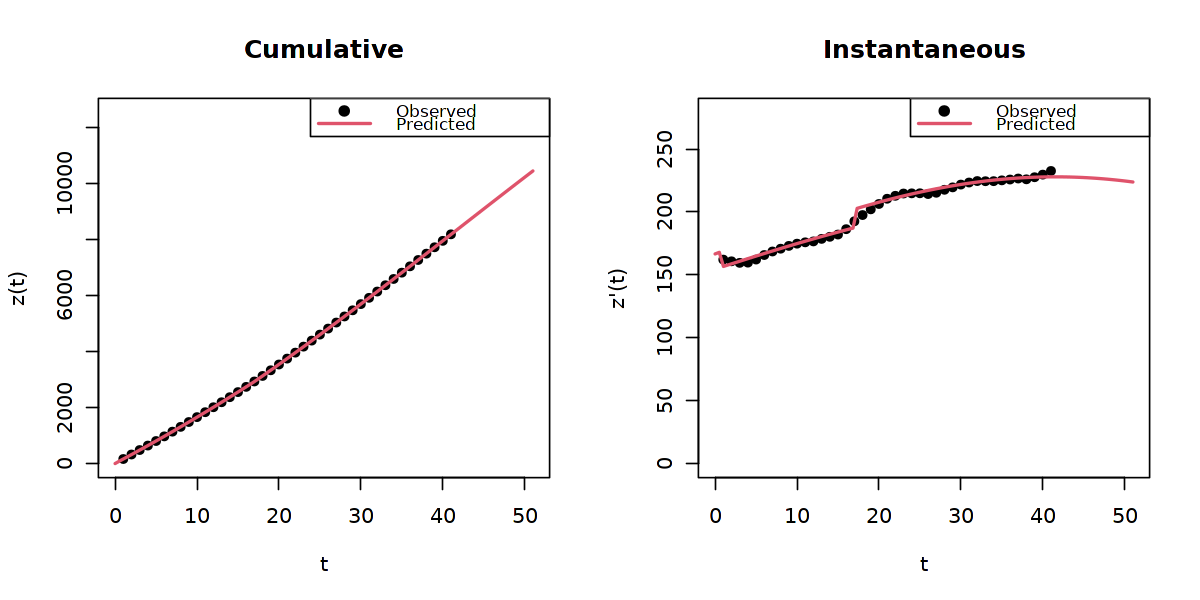

In [30]:
GBM_city_3<-GBM(city_data_3, 
                shock = "rett", 
                nshock = 1, 
                prelimestimates = c(BM(city_data_3, display=FALSE)$Estimate[1,1], 
                                    BM(city_data_3, display=FALSE)$Estimate[2,1], 
                                    BM(city_data_3, display=FALSE)$Estimate[3,1], 
                                    5,20,0.1
                                    )
                )

summary(GBM_city_3)

### 4.3 Guseo-Guidolin model

Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Call: ( Guseo Guidolin Model )

  GGM(series = city_data_1)

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1208.29  -458.83    14.71    34.85   615.39  1369.44 

Coefficients:
           Estimate    Std.Error         Lower        Upper   p-value    
K     4.908011e+05 3.955279e+06 -7.261402e+06 8.243005e+06  9.01e-01    
pc    5.806863e-05 1.029572e-06  5.605070e-05 6.008655e-05 1.39e-175 ***
qc    1.840742e-02 1.830726e-04  1.804861e-02 1.876624e-02 1.40e-256 ***
ps    9.361498e-03 8.089983e-02 -1.491993e-01 1.679223e-01  9.08e-01    
qs   -7.728048e-02 4.656183e-02 -1.6

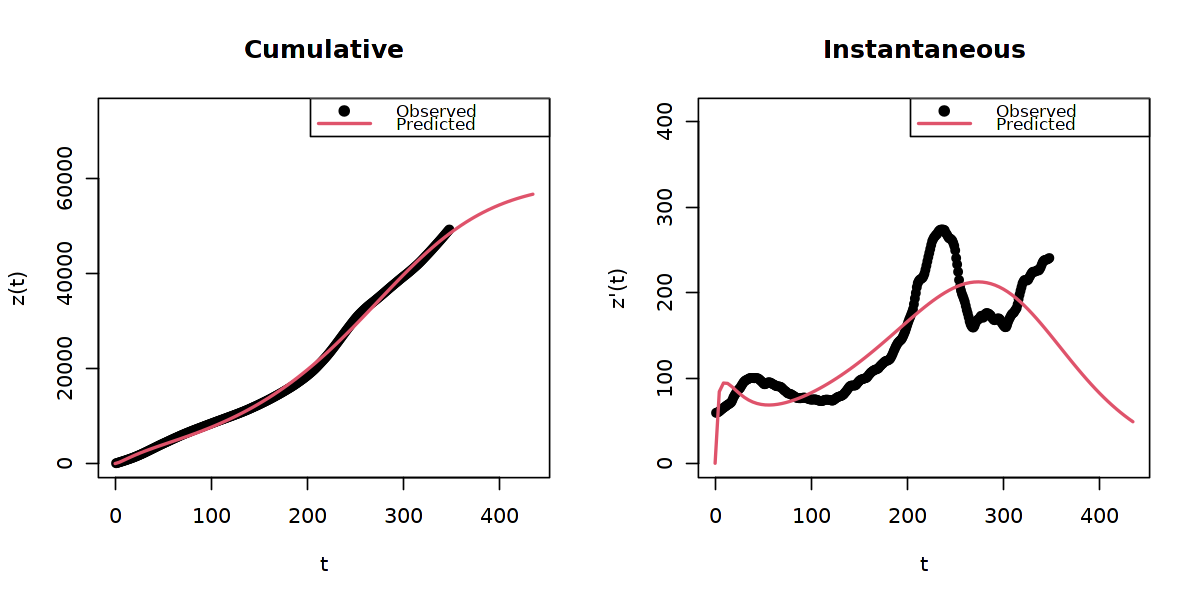

In [31]:
GGM_city_1<-GGM(city_data_1, 
                #prelimestimates=c(56.339566617, 0.001, 0.01, 0.001481412, 0.129385437)
                )

summary(GGM_city_1)

Call: ( Guseo Guidolin Model )

  GGM(series = city_data_2)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-72.141 -24.808   8.547   4.004  26.079  51.522 

Coefficients:
           Estimate    Std.Error         Lower        Upper  p-value    
K     1.207238e+05 3.084048e+08 -6.043416e+08 6.045830e+08 1.00e+00    
pc    9.506425e-02 4.985188e+02 -9.769838e+02 9.771739e+02 1.00e+00    
qc   -3.386553e+00 3.557902e+02 -7.007226e+02 6.939495e+02 9.92e-01    
ps    7.517209e-03 3.162821e-05  7.455219e-03 7.579200e-03 8.10e-86 ***
qs    3.690412e-02 4.522920e-04  3.601764e-02 3.779059e-02 6.64e-60 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  30.40728  on  56  degrees of freedom
 Multiple R-squared:   0.9999507  Residual squared sum:  56454.08

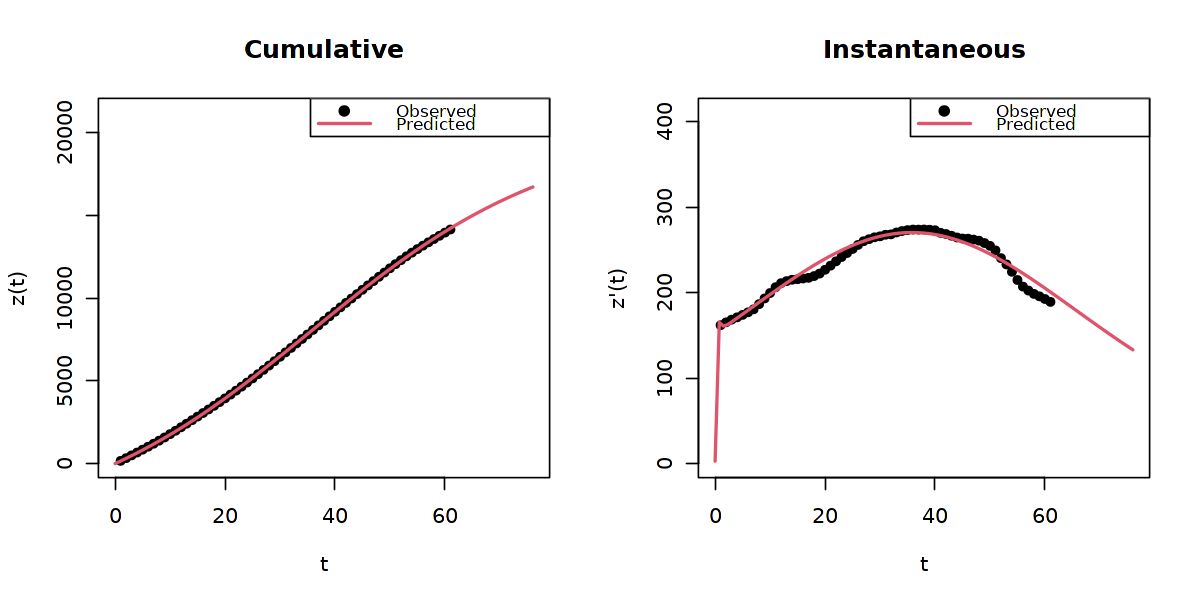

In [32]:
GGM_city_2<-GGM(city_data_2, 
                #prelimestimates=c(56.339566617, 0.001, 0.01, 0.001481412, 0.129385437)
                )

summary(GGM_city_2)

Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Call: ( Guseo Guidolin Model )

  GGM(series = city_data_3)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-24.683  -6.436   6.414   2.115  10.455  18.742 

Coefficients:
           Estimate    Std.Error         Lower        Upper  p-value    
K     2.220710e+05 4.739568e+09 -9.289160e+09 9.289604e+09 1.00e+00    
pc    6.461593e-02 2.798085e+03 -5.484080e+03 5.484210e+03 1.00e+00    
qc   -5.817285e+00 2.312662e+03 -4.538551e+03 4.526917e+03 9.98e-01    
ps    6.423612e-03 2.757044e-04  5.883241e-03 6.963983e-03 2.64e-23 ***
qs    2.508198e-02 8.847997e-04  2.334781e-02 2.68161

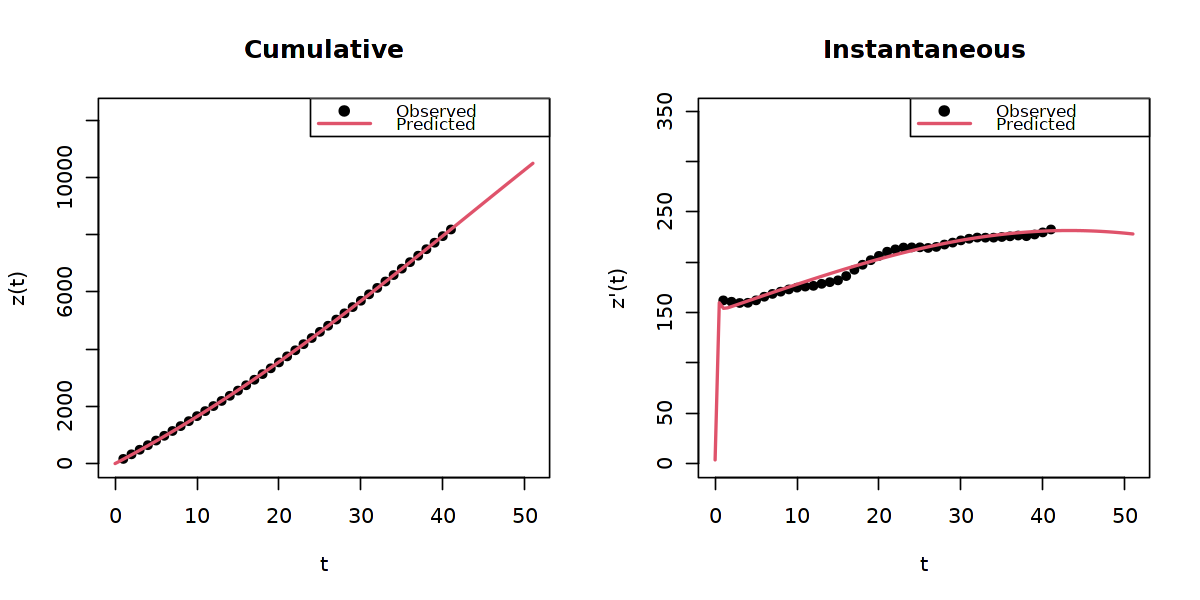

In [33]:
GGM_city_3<-GGM(city_data_3, 
                #prelimestimates=c(56.339566617, 0.001, 0.01, 0.001481412, 0.129385437)
                )

summary(GGM_city_3)

### 5) Correlations with other datasets

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=74b70e33-4e05-40e8-88b0-215b255c9984' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>